In [1]:
%matplotlib inline
import importlib
import utils2; importlib.reload(utils2)
from utils2 import *

from scipy.optimize import fmin_l_bfgs_b
from scipy.misc import imsave
from keras import metrics
from resizeimage import resizeimage

from vgg16_avg import VGG16_Avg
from bcolz_array_iterator import BcolzArrayIterator
limit_mem()


Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# Resized MS COCO dataset
arr_lr = bcolz.open('res_72')
arr_hr = bcolz.open('res_288')

In [5]:
print(arr_hr.shape)
inp_shp = arr_hr.shape[1:]

(82783, 288, 288, 3)


In [6]:
sample_hr = bcolz.carray(np.empty((0, 288, 288, 3), 'float32'), 
                   chunklen=32, mode='w', rootdir='res_288_sample')
sample_lr = bcolz.carray(np.empty((0, 72, 72, 3), 'float32'), 
                   chunklen=32, mode='w', rootdir='res_72_sample')

In [7]:
idxs = np.random.randint(low=0, high=5000, size=2048)
idxs.sort()

In [8]:
idxs

array([   0,    1,    1,    6,    7,   14,   15,   15,   16,   18,   20,
         21,   24,   24,   25,   28,   28,   29,   32,   33, ..., 4961,
       4964, 4966, 4974, 4975, 4975, 4983, 4983, 4986, 4987, 4989, 4990,
       4992, 4993, 4994, 4995, 4995, 4997, 4997, 4998])

In [9]:
sample_hr.append(arr_hr[idxs,])
sample_lr.append(arr_lr[idxs,])

In [12]:
sample_hr.flush()
sample_lr.flush()

In [10]:
sample_lr.shape

(2048, 72, 72, 3)

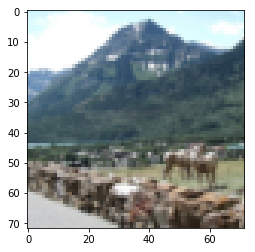

In [11]:
plt.imshow(sample_lr[0,].astype('uint8'))